<a href="https://colab.research.google.com/github/danielgrgurevic/Desafios_Bootcamp_DL/blob/main/Desaf%C3%ADo_2_Segmentaci%C3%B3n_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFÍO 2 - SEGMENTACIÓN DE CLIENTES

# 1- IMPORTACIÓN Y LIMPIEZA DE DATOS

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_excel("/content/drive/MyDrive/Data science/Desafío Latam/5 - Machine Learning /Desafío 2/Retail_Invoices.xlsx")

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [40]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)


InvoiceNo      0
InvoiceDate    0
CustomerID     0
Quantity       0
price_total    0
StockCode      0
dtype: int64


In [41]:
df.describe()

,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,22190,22190.000000,22190.000000,22190.000000,22190.000000
mean,2011-06-29 05:59:15.223073536,15238.498738,221.130599,374.045327,18.333889
min,2010-12-01 00:00:00,12346.000000,-80995.000000,-168469.600000,1.000000
25%,2011-03-29 00:00:00,13755.000000,30.000000,87.962500,3.000000
50%,2011-07-08 00:00:00,15136.000000,120.000000,241.505000,12.000000
75%,2011-10-10 00:00:00,16746.000000,254.000000,418.022500,24.000000
max,2011-12-09 00:00:00,18287.000000,80995.000000,168469.600000,542.000000
std,NaN,1733.149624,1170.215301,2018.482869,23.892111


# 2-ANÁLISIS EXPLORATORIO DE DATOS

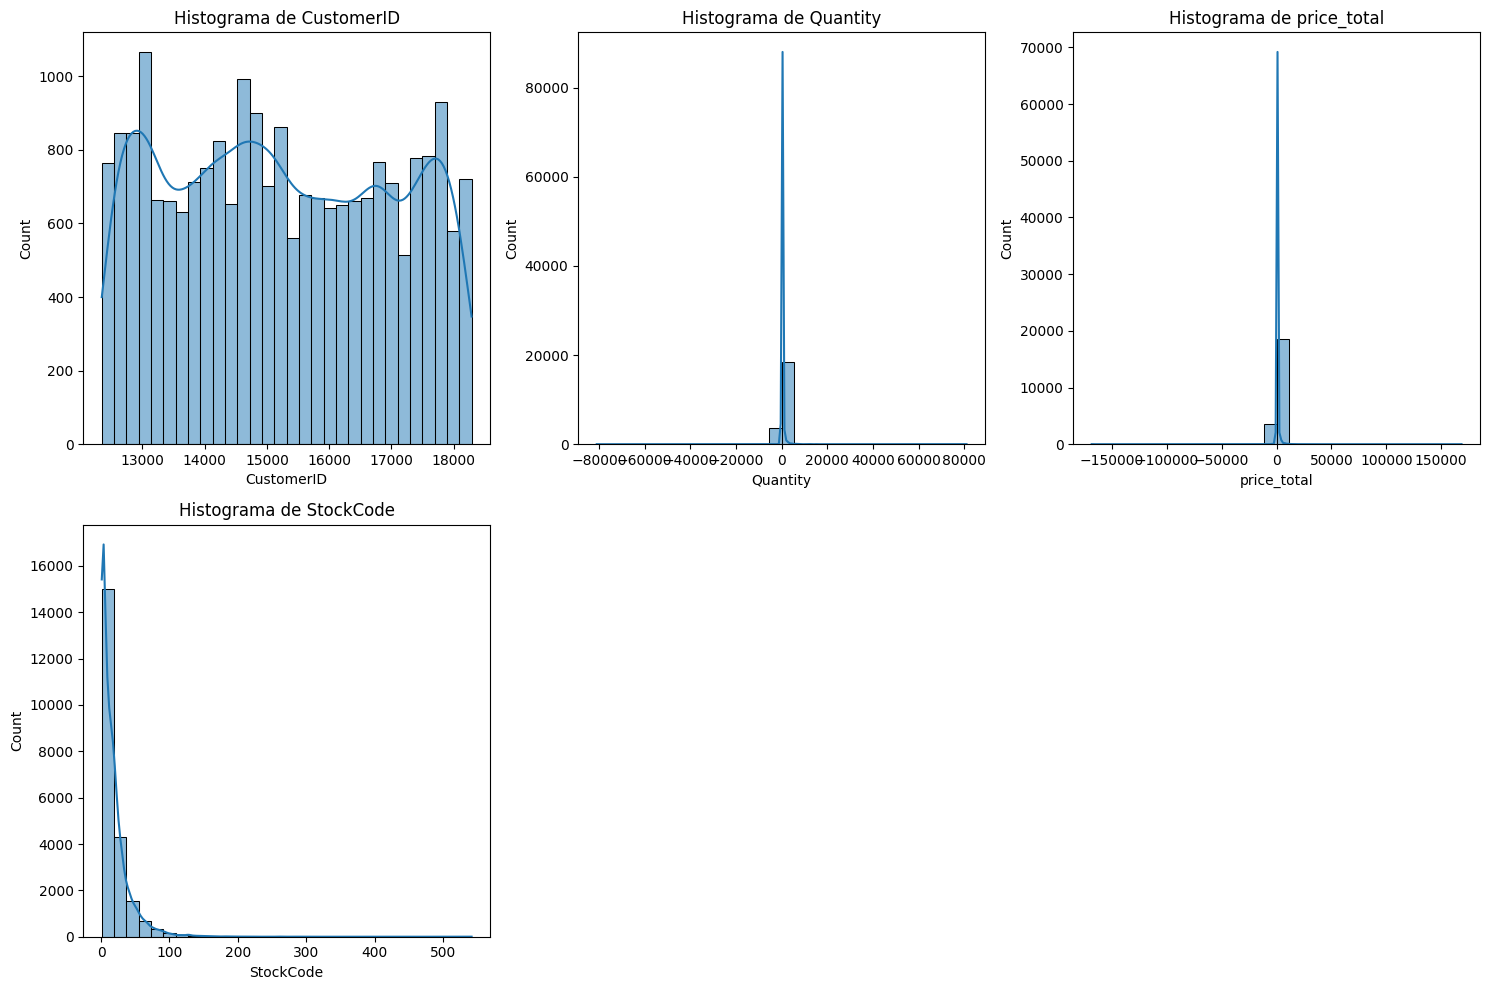

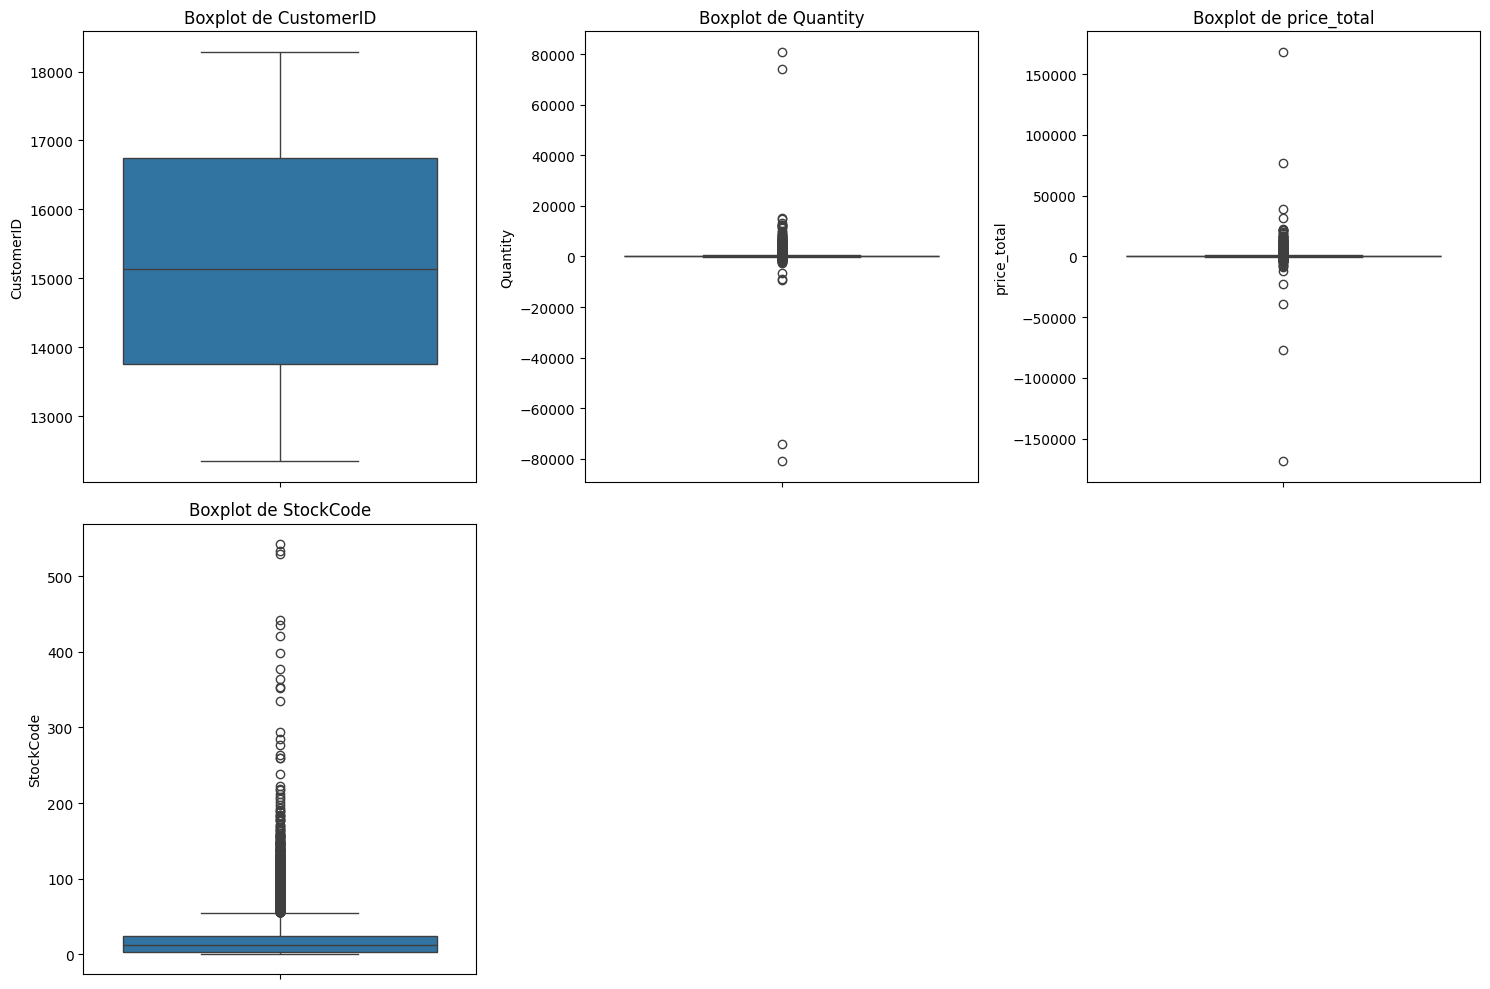

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una lista con las columnas que son numéricas
columnas_numericas = ['CustomerID', 'Quantity', 'price_total', 'StockCode']

# Generar histogramas
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Histograma de {columna}')
plt.tight_layout()
plt.show()

# Generar boxplots
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()


In [43]:
# Filtrar valores negativos en 'Quantity' y 'price_total'
df = df[(df['Quantity'] >= 0) & (df['price_total'] >= 0)]

# Calcular el percentil 95 para 'Quantity' y 'price_total'
percentil_95_quantity = df['Quantity'].quantile(0.95)
percentil_95_price_total = df['price_total'].quantile(0.95)

# Filtrar valores por encima del percentil 95
df = df[
    (df['Quantity'] <= percentil_95_quantity) &
    (df['price_total'] <= percentil_95_price_total)
]

print("Datos limpios:")
df.describe()


Datos limpios:


,InvoiceDate,CustomerID,Quantity,price_total,StockCode
count,17342,17342.000000,17342.000000,17342.000000,17342.000000
mean,2011-06-30 19:15:26.259946752,15273.289298,183.169127,321.881863,20.135106
min,2010-12-01 00:00:00,12347.000000,1.000000,0.000000,1.000000
25%,2011-03-30 00:00:00,13778.500000,70.000000,150.512500,6.000000
50%,2011-07-11 00:00:00,15189.000000,144.000000,288.535000,15.000000
75%,2011-10-12 00:00:00,16779.000000,256.000000,421.600000,26.000000
max,2011-12-09 00:00:00,18287.000000,778.000000,1233.010000,259.000000
std,NaN,1727.729874,150.885891,231.996267,20.575093


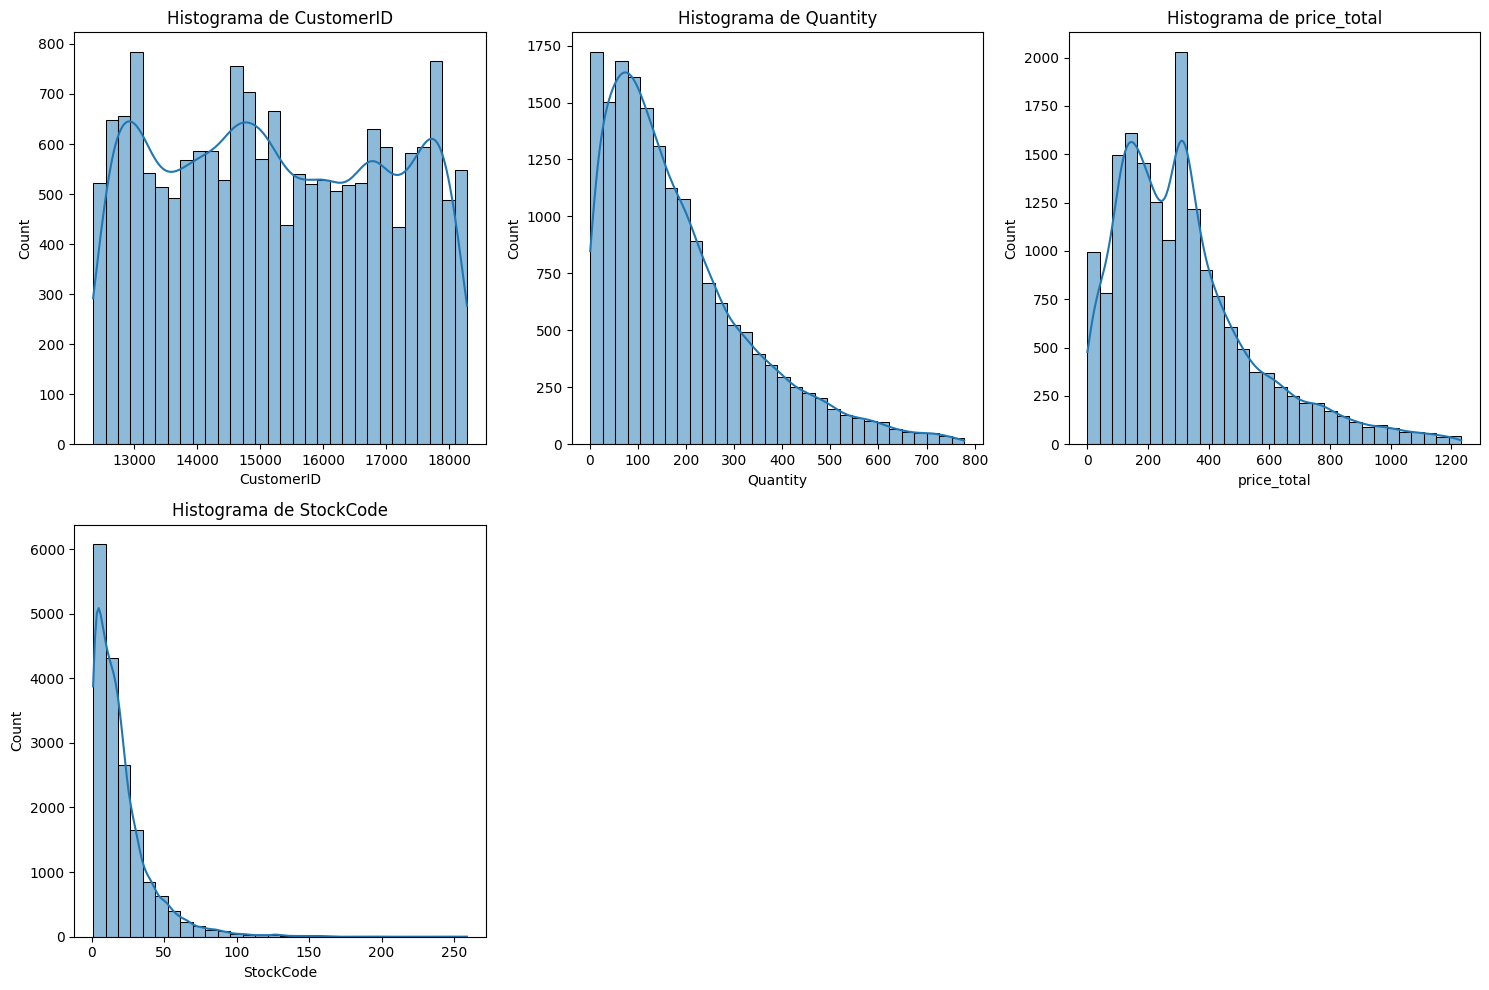

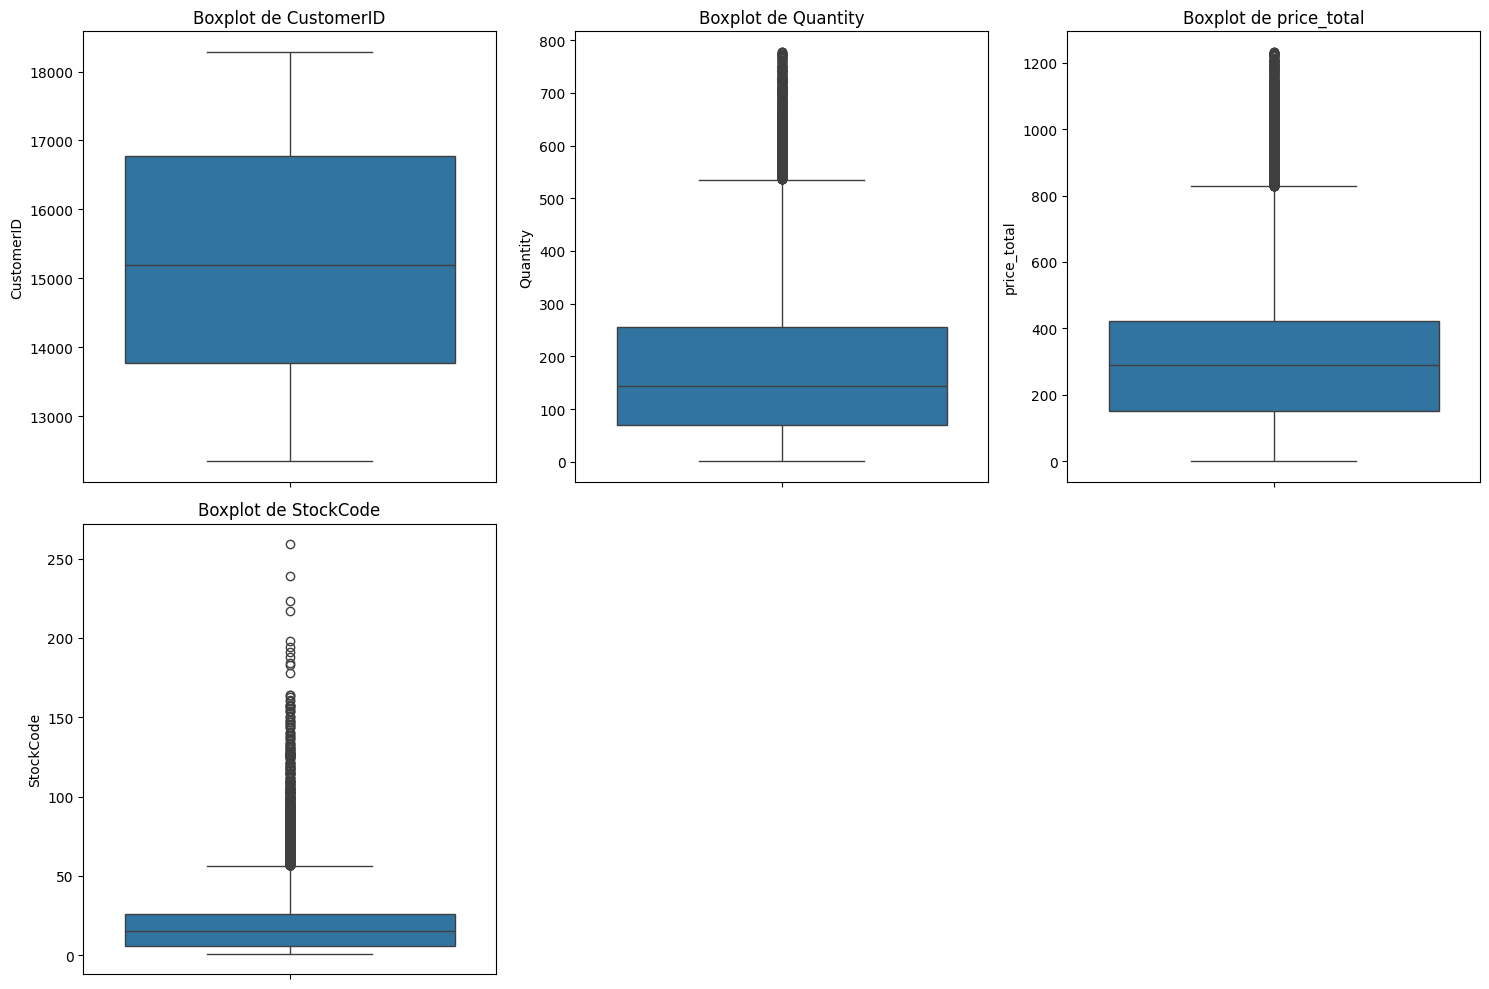

In [44]:

# Crear una lista con las columnas que son numéricas
columnas_numericas = ['CustomerID', 'Quantity', 'price_total', 'StockCode']

# Generar histogramas
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Histograma de {columna}')
plt.tight_layout()
plt.show()

# Generar boxplots
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()

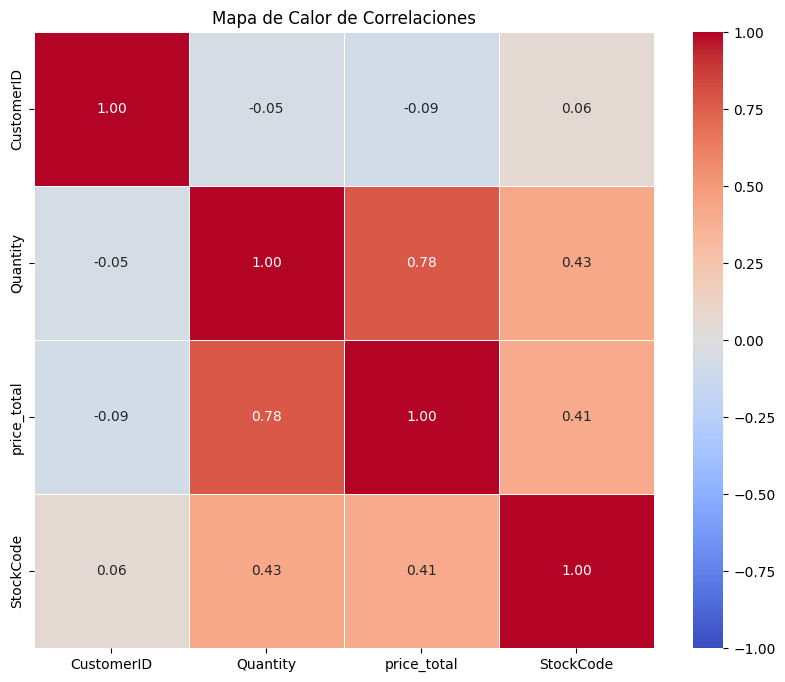

In [45]:
# Calcular la matriz de correlación
correlation_matrix = df[['CustomerID', 'Quantity', 'price_total', 'StockCode']].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

# Configurar el título
plt.title('Mapa de Calor de Correlaciones')

# Mostrar el gráfico
plt.show()


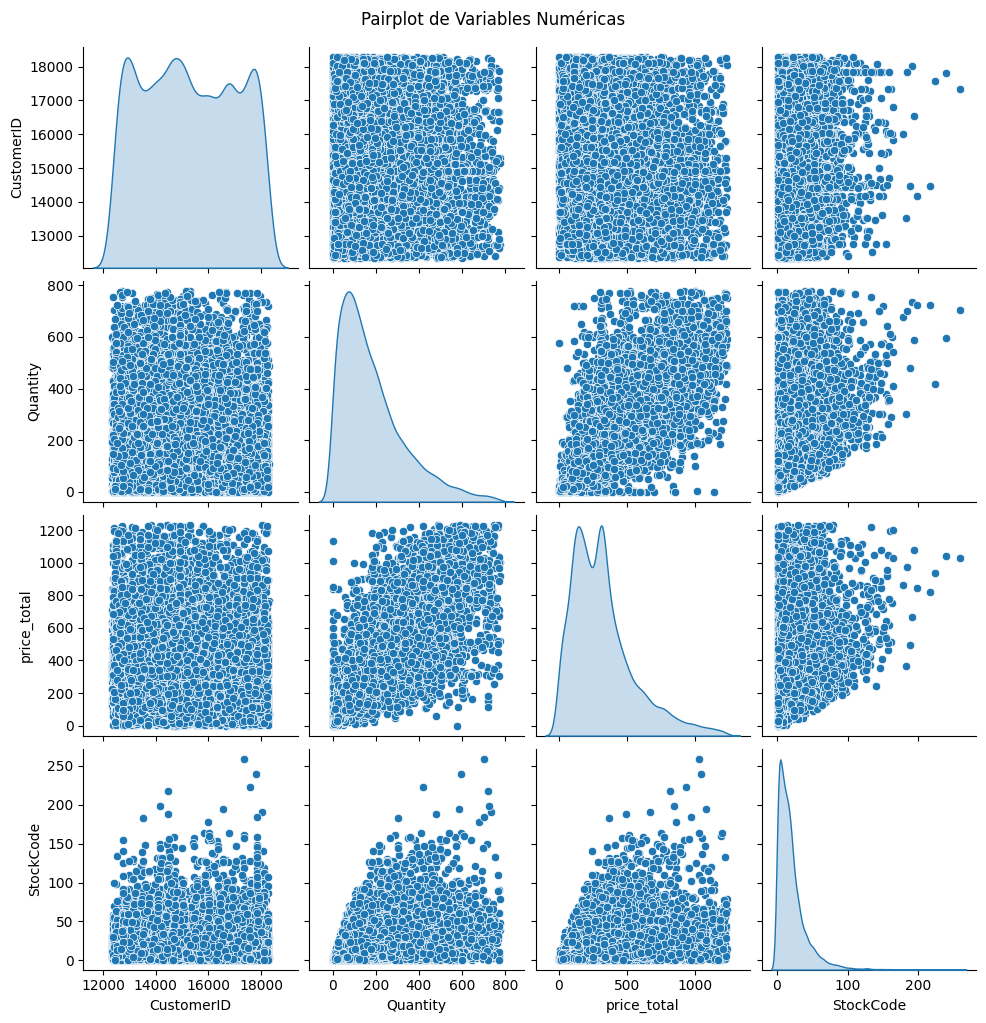

In [46]:
# Seleccionar solo las variables numéricas para el pairplot
variables_numericas = ['CustomerID', 'Quantity', 'price_total', 'StockCode']

# Crear el pairplot
sns.pairplot(df[variables_numericas], diag_kind='kde')

# Configurar el título
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)

# Mostrar el gráfico
plt.show()

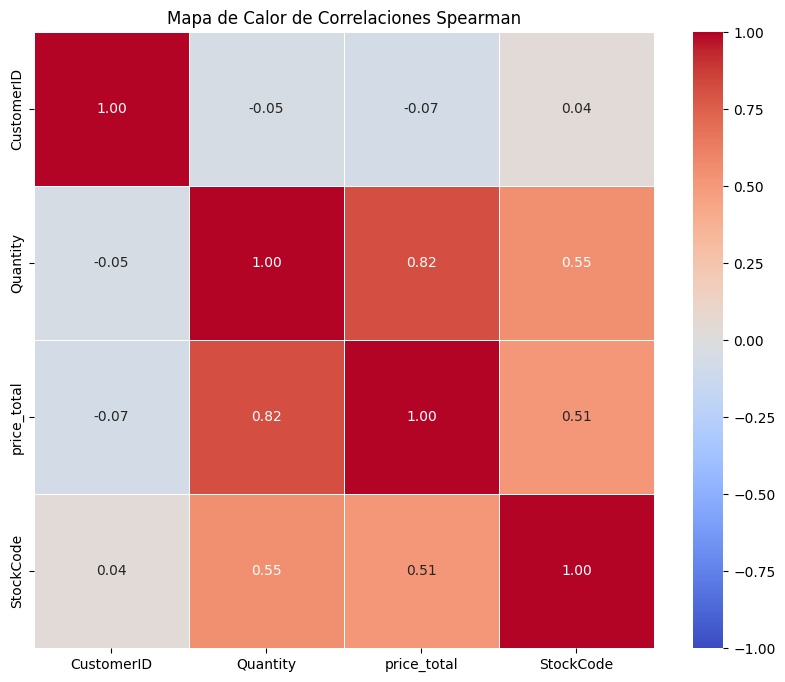

In [47]:
# Calcular la matriz de correlación de Spearman
correlation_matrix_spearman = df[variables_numericas].corr(method='spearman')

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones Spearman')
plt.show()


# 3- TRANSFORMACIÓN DE DATOS

In [48]:
# Agrupar por 'CustomerID' y sumar las columnas deseadas
df_summed = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',           # Número de transacciones (frecuencia)
    'Quantity': 'sum',              # Total de cantidad comprada
    'price_total': 'sum',           # Total gastado
    'StockCode': 'count'            # Total de productos distintos comprados
}).reset_index()

# Renombrar las columnas para claridad
df_summed.columns = ['CustomerID', 'Frequency', 'TotalQuantity', 'Monetary', 'UniqueProducts']

# Obtener la fecha máxima en tus datos como la fecha actual para el cálculo de recencia
fecha_maxima = df['InvoiceDate'].max().date()

# Calcular Recencia
recencia_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (fecha_maxima - x.max().date()).days  # Recencia
}).reset_index()

# Renombrar la columna para claridad
recencia_df.columns = ['CustomerID', 'Recency']

# Unir el DataFrame con las métricas RFM
rfm_df = df_summed.merge(recencia_df, on='CustomerID', how='left')

# Reorganizar las columnas para que 'Recency', 'Frequency', y 'Monetary' estén al final
rfm_df = rfm_df[['CustomerID', 'TotalQuantity', 'UniqueProducts', 'Recency', 'Frequency', 'Monetary']]

df = rfm_df

In [50]:
df.head()


,CustomerID,TotalQuantity,UniqueProducts,Recency,Frequency,Monetary
0,12347,1782,6,2,6,3015.68
1,12348,1087,3,75,3,904.44
2,12350,197,1,310,1,334.40
3,12352,536,8,36,8,2506.04
4,12353,20,1,204,1,89.00


In [52]:
df.describe()

,CustomerID,TotalQuantity,UniqueProducts,Recency,Frequency,Monetary
count,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000,4255.000000
mean,15313.648179,746.537955,4.075676,93.650294,4.075676,1311.886078
std,1718.080486,1424.482678,7.013883,100.777308,7.013883,2572.330806
min,12347.000000,1.000000,1.000000,0.000000,1.000000,2.900000
25%,13829.500000,153.500000,1.000000,17.500000,1.000000,299.810000
50%,15315.000000,352.000000,2.000000,51.000000,2.000000,635.680000
75%,16791.500000,840.000000,4.000000,149.000000,4.000000,1447.800000
max,18287.000000,46202.000000,203.000000,373.000000,203.000000,89188.520000


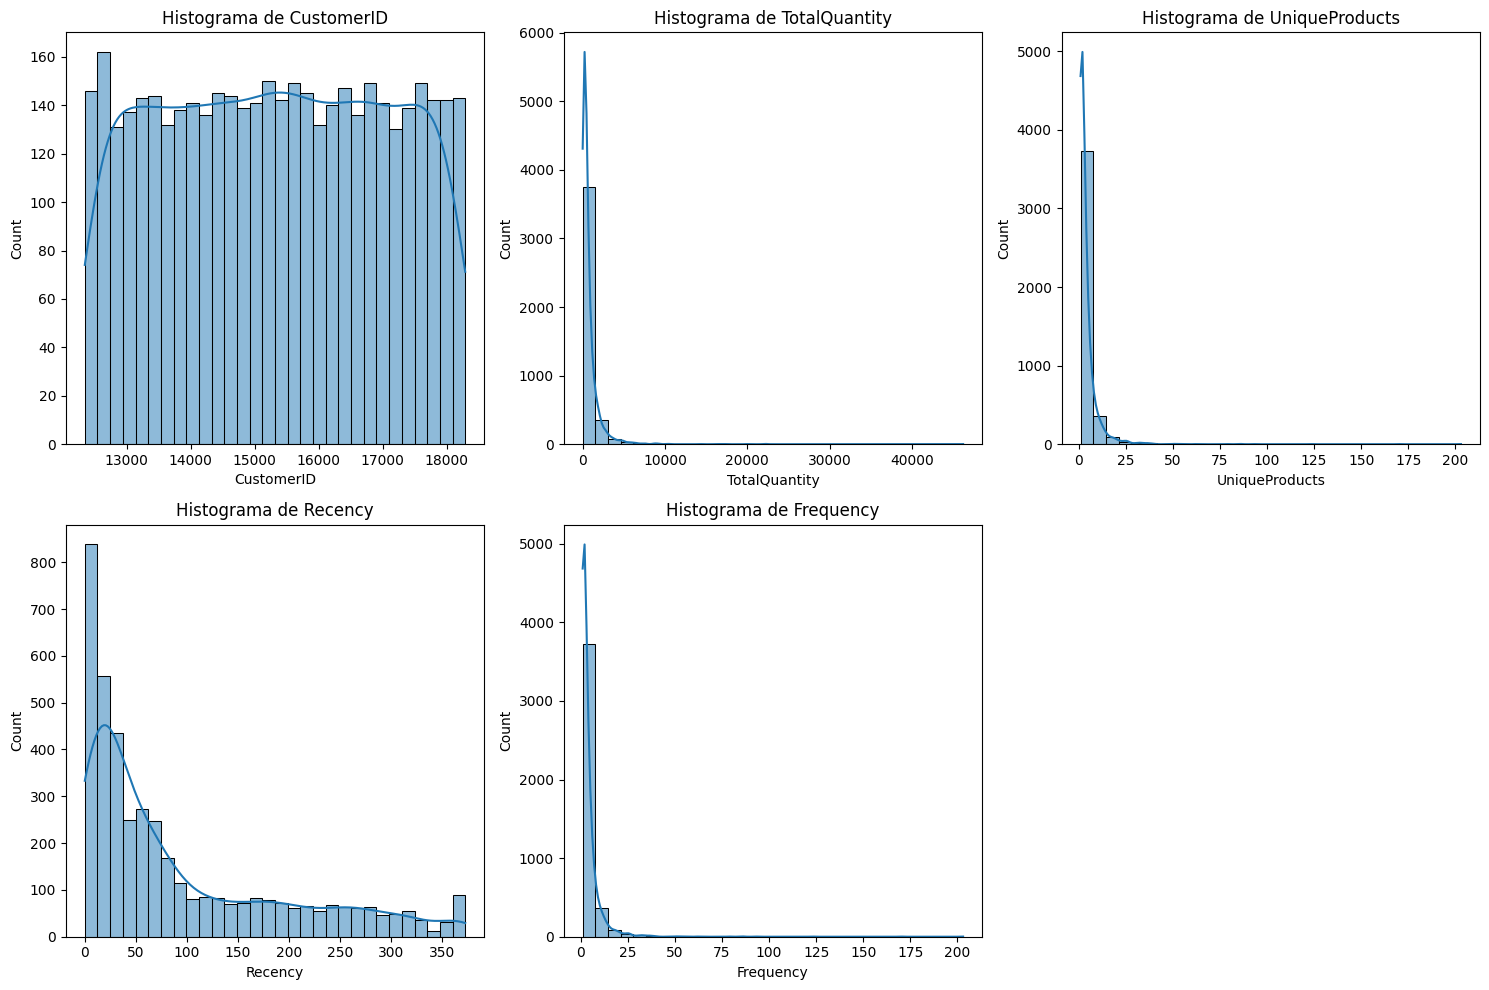

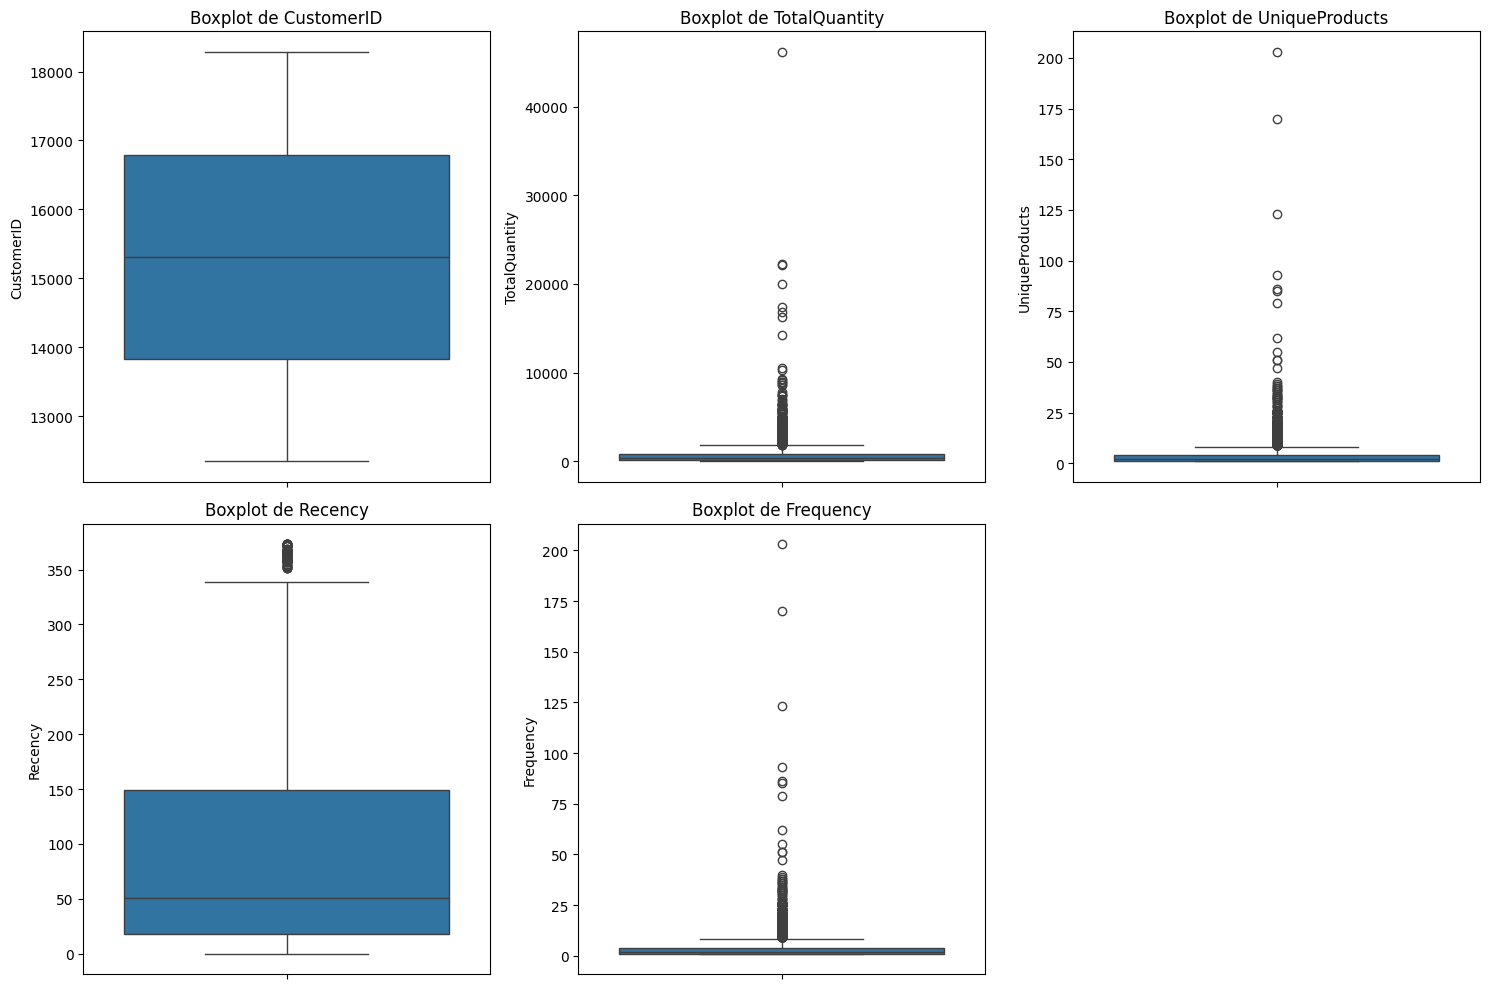

In [54]:
# Crear una lista con las columnas que son numéricas
columnas_numericas = ['CustomerID', 'TotalQuantity', 'UniqueProducts', 'Recency','Frequency']

# Generar histogramas
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(f'Histograma de {columna}')
plt.tight_layout()
plt.show()

# Generar boxplots
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_numericas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
plt.tight_layout()
plt.show()

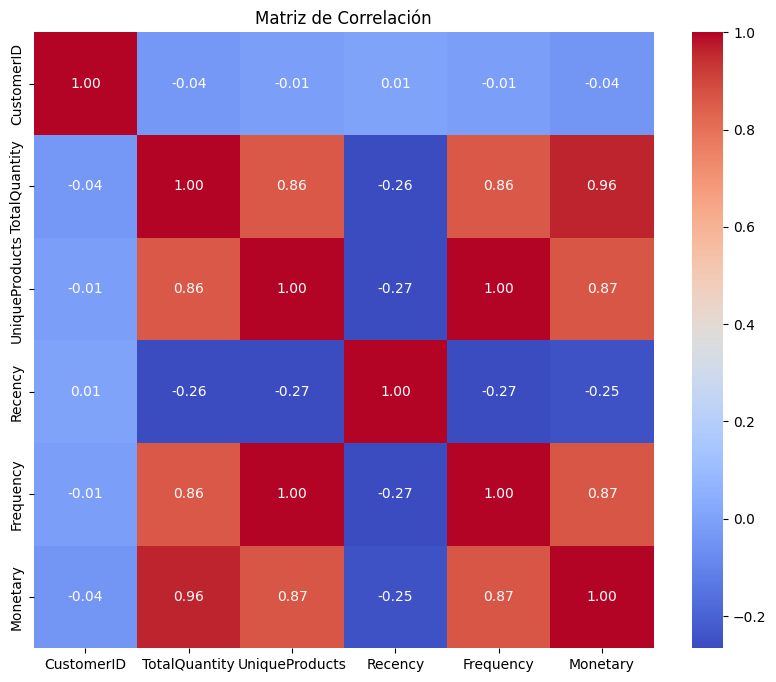

In [55]:
# Calcular la matriz de correlación
corr_matrix = rfm_df.corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


# 3- MODELO DE SEGMENTACIÓN DE CLIENTES CON K-MEANS

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Crear una copia del DataFrame para no modificar el original
df_scaled = df.copy()

# Seleccionar las columnas a escalar
columns_to_scale = ['TotalQuantity', 'UniqueProducts', 'Recency', 'Frequency', 'Monetary']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled.head()

,CustomerID,TotalQuantity,UniqueProducts,Recency,Frequency,Monetary
0,12347,0.726989,0.274392,-0.909541,0.274392,0.662432
1,12348,0.239036,-0.153382,-0.185086,-0.153382,-0.158414
2,12350,-0.385826,-0.438564,2.147062,-0.438564,-0.380045
3,12352,-0.147817,0.559574,-0.572124,0.559574,0.464285
4,12353,-0.510096,-0.438564,1.095114,-0.438564,-0.475456


In [57]:
df_scaled.describe()

,CustomerID,TotalQuantity,UniqueProducts,Recency,Frequency,Monetary
count,4255.000000,4.255000e+03,4.255000e+03,4.255000e+03,4.255000e+03,4.255000e+03
mean,15313.648179,2.003881e-17,1.502911e-17,4.926207e-17,1.502911e-17,-3.339801e-17
std,1718.080486,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00
min,12347.000000,-5.234360e-01,-4.385641e-01,-9.293888e-01,-4.385641e-01,-5.089314e-01
25%,13829.500000,-4.163671e-01,-4.385641e-01,-7.557182e-01,-4.385641e-01,-3.934933e-01
50%,15315.000000,-2.770018e-01,-2.959730e-01,-4.232630e-01,-2.959730e-01,-2.629077e-01
75%,16791.500000,6.561893e-02,-1.079068e-02,5.492924e-01,-1.079068e-02,5.284309e-02
max,18287.000000,3.191390e+01,2.836485e+01,2.772276e+00,2.836485e+01,3.416628e+01


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

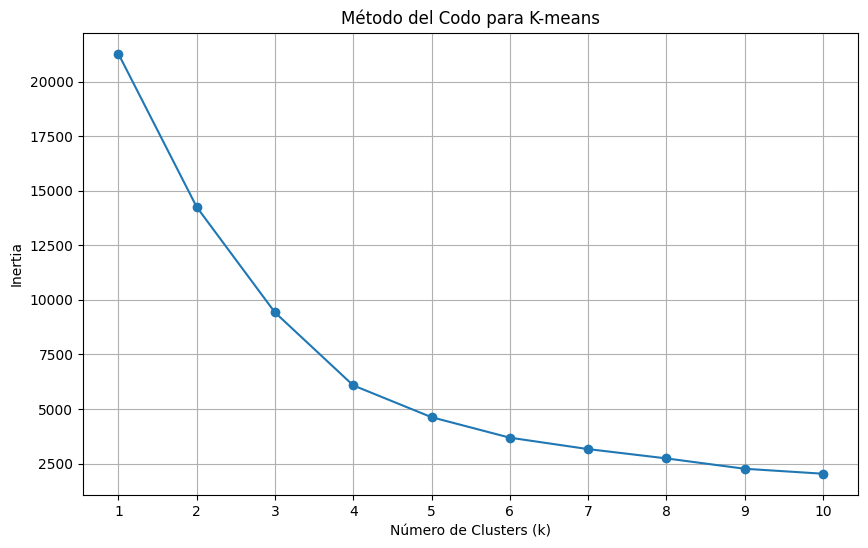

In [58]:
# Definir el rango de valores de k
k_values = range(1, 11)
inertia = []

# Ejecutar K-means para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[columns_to_scale])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para K-means')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [59]:
from sklearn.cluster import KMeans

# Crear una copia del DataFrame para no modificar el original
df_with_clusters = df.copy()

# Crear el modelo K-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustar el modelo a los datos
df_with_clusters['Cluster'] = kmeans.fit_predict(df_scaled[columns_to_scale])

# Mostrar los primeros registros con la asignación de cluster
print(df_with_clusters.head())

# Si deseas ver el centroide de cada cluster
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustomerID  TotalQuantity  UniqueProducts  Recency  Frequency  Monetary  \
0       12347           1782               6        2          6   3015.68   
1       12348           1087               3       75          3    904.44   
2       12350            197               1      310          1    334.40   
3       12352            536               8       36          8   2506.04   
4       12353             20               1      204          1     89.00   

   Cluster  
0        3  
1        3  
2        1  
3        3  
4        1  
Centroides de los clusters:
[[ 1.90561124  1.87854186 -0.78235457  1.87854186  1.90816959]
 [-0.36702447 -0.36317406  1.50789812 -0.36317406 -0.34627294]
 [12.86791086 13.72073562 -0.88076102 13.72073562 12.56913705]
 [-0.09610815 -0.09784107 -0.49651696 -0.09784107 -0.1032807 ]]


In [61]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calcular el silhouette score
silhouette_avg = silhouette_score(df_scaled[columns_to_scale], df_with_clusters['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Calcular el Davies-Bouldin index
davies_bouldin_avg = davies_bouldin_score(df_scaled[columns_to_scale], df_with_clusters['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")


Silhouette Score: 0.5271
Davies-Bouldin Index: 0.6480


**Evaluación kmeans**

# 4- MODELO DE SEGMENTACIÓN DE CLIENTES CON CLUSTERING JERÁRQUICO AGLOMERATIVO

In [62]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [63]:
df_scaled.head()

,CustomerID,TotalQuantity,UniqueProducts,Recency,Frequency,Monetary
0,12347,0.726989,0.274392,-0.909541,0.274392,0.662432
1,12348,0.239036,-0.153382,-0.185086,-0.153382,-0.158414
2,12350,-0.385826,-0.438564,2.147062,-0.438564,-0.380045
3,12352,-0.147817,0.559574,-0.572124,0.559574,0.464285
4,12353,-0.510096,-0.438564,1.095114,-0.438564,-0.475456


In [64]:
columns_to_scale = ['TotalQuantity', 'UniqueProducts', 'Recency', 'Frequency', 'Monetary']
X = df_scaled[columns_to_scale]

# Crear el modelo Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Ajustar el modelo a los datos
df_with_agg_clusters = df.copy()
df_with_agg_clusters['Agg_Cluster'] = agg_clustering.fit_predict(X)

In [65]:
df_with_agg_clusters

,CustomerID,TotalQuantity,UniqueProducts,Recency,Frequency,Monetary,Agg_Cluster
0,12347,1782,6,2,6,3015.68,3
1,12348,1087,3,75,3,904.44,3
2,12350,197,1,310,1,334.40,2
3,12352,536,8,36,8,2506.04,0
4,12353,20,1,204,1,89.00,2
...,...,...,...,...,...,...,...
4250,18280,45,1,277,1,180.60,2
4251,18281,54,1,180,1,80.82,2
4252,18282,103,2,7,2,178.05,3
4253,18283,1397,16,3,16,2094.88,0


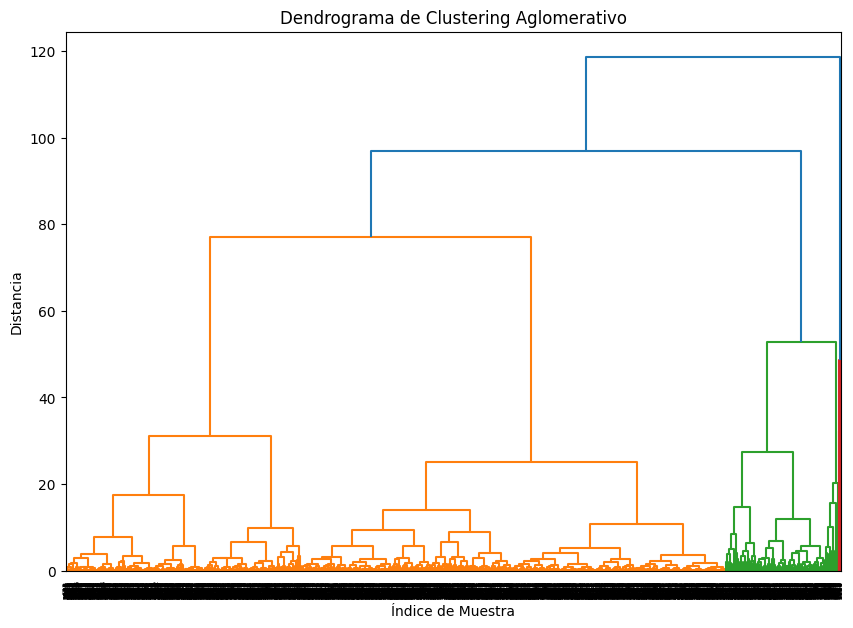

In [66]:
# Generar el linkage matrix
linked = linkage(X, method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma de Clustering Aglomerativo')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()


In [68]:
# Evaluar Agglomerative Clustering
silhouette_agg = silhouette_score(X, df_with_agg_clusters['Agg_Cluster'])
davies_bouldin_agg = davies_bouldin_score(X, df_with_agg_clusters['Agg_Cluster'])
print(f"Agglomerative Clustering - Silhouette Score: {silhouette_agg:.4f}")
print(f"Agglomerative Clustering - Davies-Bouldin Index: {davies_bouldin_agg:.4f}")

Agglomerative Clustering - Silhouette Score: 0.4847
Agglomerative Clustering - Davies-Bouldin Index: 0.7112


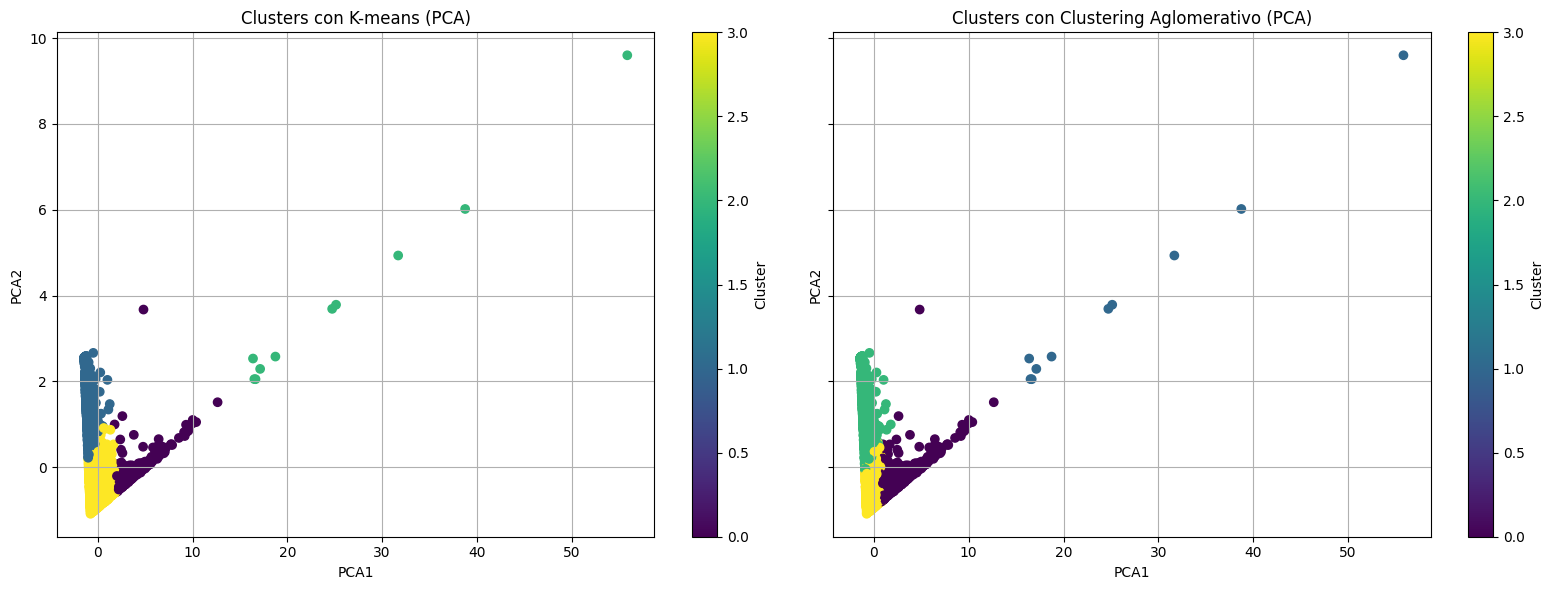

In [72]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2D para la visualización
pca = PCA(n_components=2)

# PCA para datos de K-means
pca_result_kmeans = pca.fit_transform(df_scaled[columns_to_scale])
df_with_clusters['PCA1'] = pca_result_kmeans[:, 0]
df_with_clusters['PCA2'] = pca_result_kmeans[:, 1]

# PCA para datos de Clustering Aglomerativo
pca_result_agg = pca.fit_transform(df_scaled[columns_to_scale])
df_with_agg_clusters['PCA1'] = pca_result_agg[:, 0]
df_with_agg_clusters['PCA2'] = pca_result_agg[:, 1]

# Crear gráficos comparativos
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Gráfico para K-means
scatter_kmeans = axs[0].scatter(df_with_clusters['PCA1'], df_with_clusters['PCA2'],
                                c=df_with_clusters['Cluster'], cmap='viridis', marker='o')
axs[0].set_title('Clusters con K-means (PCA)')
axs[0].set_xlabel('PCA1')
axs[0].set_ylabel('PCA2')
fig.colorbar(scatter_kmeans, ax=axs[0], label='Cluster')
axs[0].grid(True)

# Gráfico para Clustering Aglomerativo
scatter_agg = axs[1].scatter(df_with_agg_clusters['PCA1'], df_with_agg_clusters['PCA2'],
                             c=df_with_agg_clusters['Agg_Cluster'], cmap='viridis', marker='o')
axs[1].set_title('Clusters con Clustering Aglomerativo (PCA)')
axs[1].set_xlabel('PCA1')
axs[1].set_ylabel('PCA2')
fig.colorbar(scatter_agg, ax=axs[1], label='Cluster')
axs[1].grid(True)

plt.tight_layout()
plt.show()


**K-means parece ser el mejor algoritmo en este caso, ya que tiene un Silhouette Score más alto y un Davies-Bouldin Index más bajo. Esto sugiere que K-means genera clusters que están mejor separados y son más compactos en comparación con el clustering aglomerativo**.

# 5- DESCRIPCIÓN DE CADA CLÚSTER

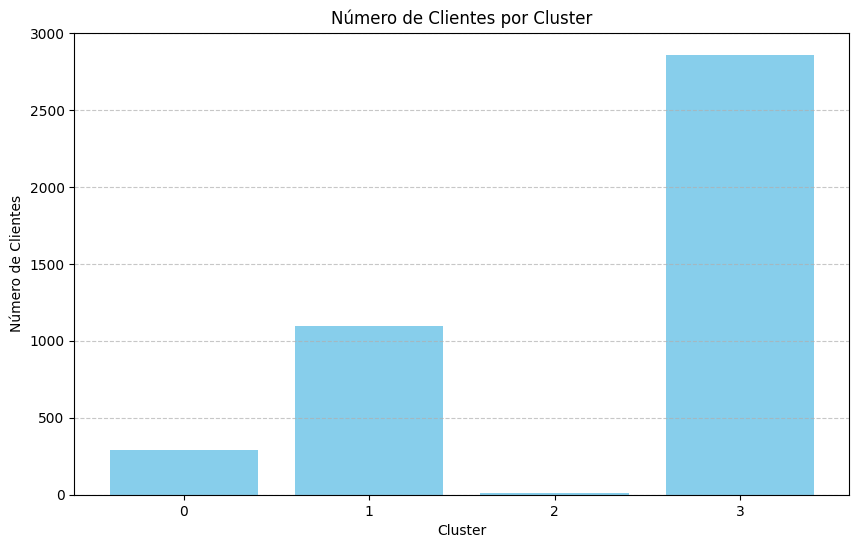

In [78]:
# Contar el número de clientes en cada cluster
cluster_counts = df_with_clusters['Cluster'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes por Cluster')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [79]:
cluster_counts

,count
Cluster,
0,288
1,1097
2,10
3,2860


In [73]:
# Agrupar por cluster y calcular estadísticas descriptivas
segment_stats = df_with_clusters.groupby('Cluster').agg({
    'TotalQuantity': ['mean', 'std', 'min', 'max'],
    'UniqueProducts': ['mean', 'std', 'min', 'max'],
    'Recency': ['mean', 'std', 'min', 'max'],
    'Frequency': ['mean', 'std', 'min', 'max'],
    'Monetary': ['mean', 'std', 'min', 'max']
}).reset_index()

segment_stats.columns = ['Cluster', 'TotalQuantity_mean', 'TotalQuantity_std', 'TotalQuantity_min', 'TotalQuantity_max',
                         'UniqueProducts_mean', 'UniqueProducts_std', 'UniqueProducts_min', 'UniqueProducts_max',
                         'Recency_mean', 'Recency_std', 'Recency_min', 'Recency_max',
                         'Frequency_mean', 'Frequency_std', 'Frequency_min', 'Frequency_max',
                         'Monetary_mean', 'Monetary_std', 'Monetary_min', 'Monetary_max']


In [75]:
pd.set_option('display.max_columns', None)

In [76]:
segment_stats

,Cluster,TotalQuantity_mean,TotalQuantity_std,TotalQuantity_min,TotalQuantity_max,UniqueProducts_mean,UniqueProducts_std,UniqueProducts_min,UniqueProducts_max,Recency_mean,Recency_std,Recency_min,Recency_max,Frequency_mean,Frequency_std,Frequency_min,Frequency_max,Monetary_mean,Monetary_std,Monetary_min,Monetary_max
0,0,3460.729167,1720.155555,560,10482,17.250000,7.607075,6,55,14.815972,28.895417,0,372,17.250000,7.607075,6,55,6219.752674,3193.887975,1296.44,19914.44
1,1,223.779398,229.030165,1,2053,1.528715,1.026717,1,12,245.594348,67.195043,133,373,1.528715,1.026717,1,12,421.262197,414.231128,2.90,4630.10
2,2,19074.500000,10830.456031,6224,46202,100.300000,50.765364,51,203,4.900000,11.666190,0,38,100.300000,50.765364,51,203,33640.065000,21808.972204,11189.91,89188.52
3,3,609.649650,540.570798,1,3374,3.389510,2.458191,1,14,43.618531,35.780679,0,172,3.389510,2.458191,1,14,1046.245179,895.296124,4.95,5207.02


### Cluster 0: Clientes de Alto Gasto y Frecuentes
- **Número de Clientes**: 288
- **TotalQuantity**: Alto promedio (3460), con gran variabilidad (SD: 1720).
- **UniqueProducts**: Compran una variedad de productos (promedio: 17).
- **Recency**: Compras relativamente frecuentes (promedio: 14.8 días desde la última compra).
- **Frequency**: Alta frecuencia de compras (promedio: 17.25 veces).
- **Monetary**: Gasto muy alto (promedio: 6219.75).

**Descripción**: Son los clientes más valiosos y activos, con un gasto y frecuencia de compras elevados.

### Cluster 1: Clientes Poco Activos y de Bajo Gasto
- **Número de Clientes**: 1097
- **TotalQuantity**: Bajo promedio (223.78) con alta variabilidad.
- **UniqueProducts**: Compran pocos productos (promedio: 1.53).
- **Recency**: Larga duración desde la última compra (promedio: 245.59 días).
- **Frequency**: Compras esporádicas (promedio: 1.53 veces).
- **Monetary**: Gasto bajo (promedio: 421.26).

**Descripción**: Estos clientes tienen un bajo nivel de actividad y gasto.

### Cluster 2: Grandes Compradores
- **Número de Clientes**: 10
- **TotalQuantity**: Muy alto promedio (19074.50) y amplio rango (6224 - 46202).
- **UniqueProducts**: Compran una gran variedad de productos (promedio: 100.30).
- **Recency**: Compran muy frecuentemente (promedio: 4.90 días desde la última compra).
- **Frequency**: Alta frecuencia de compras (promedio: 100.30).
- **Monetary**: Gastan significativamente (promedio: 33640.07).

**Descripción**: Aunque el número de clientes es muy bajo, estos clientes son extremadamente valiosos debido a su alto gasto y frecuencia de compra.

### Cluster 3: Compradores Moderados
- **Número de Clientes**: 2860
- **TotalQuantity**: Promedio moderado (609.65), con amplia variabilidad.
- **UniqueProducts**: Compran una variedad moderada de productos (promedio: 3.39).
- **Recency**: Compras intermedias (promedio: 43.62 días desde la última compra).
- **Frequency**: Compras moderadas (promedio: 3.39 veces).
- **Monetary**: Gasto intermedio (promedio: 1046.25).

**Descripción**: Estos clientes muestran un comportamiento de compra moderado, tienen un gasto promedio intermedio y son numerosos.